In [1]:
## primitivas
ERR = 1.0e-5

def area2 (a, b, c):
    return (b.x - a.x)*(c.y - a.y) - (b.y - a.y)*(c.x - a.x)

def cmpFloat(a, b):
	if (abs(a-b) < ERR):
		return 0
	elif (a + ERR > b):
		return 1
	return -1

def float_left (a, b, c):
	if(cmpFloat(area2 (a, b, c), 0) == 1):
		return True
	return False

def float_left_on (a, b, c):
	if(cmpFloat(area2 (a, b, c), 0) == 0):
		return True
	return False

def left_on (a, b, c):
    return area2 (a, b, c) >= 0

def left (a, b, c):
    return area2 (a, b, c) > 0

def colinear (a, b, c):
    return area2 (a, b, c) == 0

def intersect_prop(a, b, c, d):

    if colinear(a, b, c) or \
       colinear(a, b, d) or \
       colinear(a, c, d) or \
       colinear(b, c, d):
        return False

    return left(a, b, c) ^ left(a, b, d) and \
           left(c, d, a) ^ left(c, d, b)

def intersect(a, b, c, d):

    if intersect_prop(a, b, c, d):
        return True

    if on_segment(a, b, c) or \
       on_segment(a, b, d) or \
       on_segment(c, d, a) or \
       on_segment(c, d, b):
        return True
    
    return False
  
def on_segment(a, b, c):

    if not colinear(a, b, c):
        return False

    if a.x != b.x:
        return \
            a.x <= c.x <= b.x or \
            b.x <= c.x <= a.x
    return \
        a.y <= c.y <= b.y or \
        b.y <= c.y <= a.y

In [2]:
## point
class Point:
    def __init__ (self, xs, ys):
        self.x = xs
        self.y = ys
        self.polygon_id = -1
        self.lineto_id = {}

    def __repr__ (self):
        res = "("
        for i in self.__coord:
            res += " " + repr(i) + ","
        return res[:-1] + " )"

    def __add__(self, other):
        return Point(self.x + other.x, self.y + other.y)

    def __sub__(self, other):
        return Point(self.x - other.x, self.y - other.y)

    def __eq__(self, other):
        if self is other:
            return True
        if type(self) != type(other):
            return False
        return self.x == other.x and self.y == other.y

    def __hash__(self):
        return 31 * hash(self.x) + hash(self.y)


In [3]:
## segment
class Segment:
    def __init__ (self, pto_from=None, pto_to=None):
        self.init  = pto_from
        self.to = pto_to
        if self.__cmp(self.init, self.to) < 0:
            self.upper = self.init
            self.lower = self.to
        else:
            self.upper = self.to
            self.lower = self.init

    def __repr__ (self):
        return '[ ' + repr(self.init) + '; ' + repr(self.to) + ' ]'

    def __eq__(self, other):
        if self is other:
            return True
        if type(self) != type(other):
            return False
        if self.init == other.init and self.to == other.to:
            return True
        if self.init == other.to and self.to == other.init:
            return True
        return False

    def endpoints(self):
        return self.init, self.to

    def __cmp(self, a, b):
        if a.y > b.y:
            return -1
        if b.y > a.y:
            return 1
        if a.x < b.x:
            return -1
        if b.x < a.x:
            return 1
        return 0

In [4]:
class PointBST:
    
    class Node:
        def __init__(self, k, h, s, r, l, sg):
            self.key = k #key is a point
            self.height = h
            self.size = s
            self.right = r
            self.left = l
            self.segment = sg

    def __init__(self):
        self.root = None

    def isEmpty(self):
        return self.root == None
    
    def size (self):
        return size_aux(self.root)
    
    def size_aux(self, n):
        if (n == None): 
            return 0
        return n.size

    def height (self):
        return height_aux(self.root)
    
    def height_aux(self, n):
        if (n == None): 
            return -1
        return n.height

    def removeMinKey(self):
        node = self.root
        while (node.left != None):   
            node = node.left
        self.remove(node.key)
        return node

    def insert (self, point, segment):
        if (self.root == None):
            self.root = self.Node(point, 0, 1, None, None, segment)    
        else:
            self.root = self.insert_aux(self.root, point, segment)
    
    def compare_to (self, p1, p2):
        if (p1.x > p2.x):
            return 1
        elif (p1.x < p2.x):
            return -1
        return 0

    def insert_aux (self, node, point, segment):
        if (node == None):
            return self.Node(point, 0, 1, None, None, segment)
        cmp = self.compare_to(node.key, point)
        if (cmp > 0):
            node.left = self.insert_aux(node.left, point, segment)
        elif (cmp < 0):
            node.right = self.insert_aux(node.right, point, segment)
        else:
            if (node.key.y > point.y):
               node.left = self.insert_aux(node.left, point, segment)
            else:
                node.right = self.insert_aux(node.right, point, segment)
                
        node.size = 1 + self.size_aux(node.left) + self.size_aux(node.right)
        node.height = 1 + max(self.height_aux(node.left), self.height_aux(node.right))
        return self.balance(node)

    def balance_factor(self, node):
        return self.height_aux(node.left) - self.height_aux(node.right)

    def balance (self, node):
        if (self.balance_factor(node) < -1):
            if (self.balance_factor(node.right) > 0):
                node.right = self.rotate_right(node.right)
            node = self.rotate_left(node)

        elif (self.balance_factor(node) > 1):
            if (self.balance_factor(node.left) < 0):
                node.left = self.rotate_left(node.left)
            node = self.rotate_right(node)

        return node        

    def rotate_right(self, node):
        node2 = node.left
        node.left = node2.right
        node2.right = node
        node2.size = node.size
        node.size = 1 + self.size_aux(node.left) + self.size_aux(node.right)
        node.height = 1 + max(self.height_aux(node.left), self.height_aux(node.right))
        node2.height = 1 + max(self.height_aux(node2.left), self.height_aux(node2.right))
        return node2

    def rotate_left(self, node):
        node2 = node.right
        node.right = node2.left
        node2.left = node
        node2.size = node.size
        node.size = 1 + self.size_aux(node.left) + self.size_aux(node.right)
        node.height = 1 + max(self.height_aux(node.left), self.height_aux(node.right))
        node2.height = 1 + max(self.height_aux(node2.left), self.height_aux(node2.right))
        return node2

    def contains(self, point):
        if (point == None): return False
        return self.contains_aux(self.root, point)

    def contains_aux(self, node, point):
        if (node == None):
            return node
        cmp = self.compare_to(node.key, point)
        if (cmp > 0):
            return self.contains_aux(node.left, point)
        elif (cmp < 0):
            return self.contains_aux(node.right, point)
        else:
            if (node.key.y > point.y):
                return self.contains_aux(node.left, point)
            elif (node.key.y < point.y):
                return self.contains_aux(node.right, point)
            else:
                return node

    def remove(self, point):
        if (self.contains(point)):
            self.root = self.remove_aux(self.root, point)

    def remove_aux(self, node, point):
        cmp = self.compare_to(node.key, point)
        if (cmp > 0): node.left = self.remove_aux(node.left, point)
        elif (cmp < 0): node.right = self.remove_aux(node.right, point)
        else:
                if (node.key.y > point.y):
                    node.left = self.remove_aux(node.left, point)
                elif (node.key.y < point.y):
                    node.right = self.remove_aux(node.right, point)
                else:
                    if (node.left == None):
                        return node.right
                    elif(node.right == None):
                        return node.left
                    else:
                        node_y = self.Node(node.key, node.height, node.size, node.right, node.left, node.segment)
                        node = self.min_aux(node_y.right)
                        node.right = self.remove_min_aux(node_y.right)
                        node.left = node_y.left  
        
        node.size = 1 + self.size_aux(node.left) + self.size_aux(node.right)
        node.height = 1 + max(self.height_aux(node.left), self.height_aux(node.right))
        return self.balance(node)

    def remove_min(self):
        if(not self.isEmpty()):
            self.root = self.remove_min_aux(self.root)

    def remove_min_aux(self, node):
        if (node.left == None): return node.right
        node.left = self.remove_min_aux(node.left)
        node.size = 1 + self.size_aux(node.left) + self.size_aux(node.right)
        node.height = 1 + max(self.height_aux(node.left), self.height_aux(node.right))
        return self.balance(node)

    def min(self):
        if (not self.isEmpty()):
            return self.min_aux(self.root)

    def min_aux(self, node):
        if(node.left == None):
            return node
        return self.min_aux(node.left)

In [5]:
class SegmentBST:
    
    class Node:
        def __init__(self, k, h, s, r, l):
            self.key = k #key is a segment
            self.height = h
            self.size = s
            self.right = r
            self.left = l

    def __init__(self):
        self.root = None

    def isEmpty(self):
        return self.root == None
    
    def size (self):
        return size_aux(self.root)
    
    def size_aux(self, n):
        if (n == None): 
            return 0
        return n.size

    def height (self):
        return height_aux(self.root)
    
    def height_aux(self, n):
        if (n == None): 
            return -1
        return n.height
    
    def get_y_coord (self, l, r, x):
        return ((r.y - l.y)/(r.x - l.x)) * (x - (l.x)) + l.y

    def compare_to (self, p, s):
        left_test = float_left(s.init, s.to, p)
        left_on_test = float_left_on(s.init, s.to, p)

        if (left_on_test): return 0
        elif (left_test): return 1
        else: return -1

    def insert (self, segment, sweepline_point):
        if (self.root == None):
            self.root = self.Node(segment, 0, 1, None, None)    
        else:
            self.root = self.insert_aux(self.root, segment, sweepline_point)

    def insert_aux (self, node, segment, sweepline_point):
        if (node == None):
            return self.Node(segment, 0, 1, None, None)
        cmp = self.compare_to(sweepline_point, node.key)
        if (cmp < 0):
            node.left = self.insert_aux(node.left, segment, sweepline_point)
        elif (cmp > 0):
            node.right = self.insert_aux(node.right, segment, sweepline_point)

        else:
            if (node.key.init == segment.to):
                    cmp = -self.compare_to(segment.init, node.key)
            elif(node.key.to == segment.to):
                cmp = self.compare_to(segment.init, node.key)
            else:
                cmp = self.compare_to(segment.to, node.key)

            if (cmp < 0):
                node.left = self.insert_aux(node.left, segment, sweepline_point)
            else: 
                node.right = self.insert_aux(node.right, segment, sweepline_point)

        node.size = 1 + self.size_aux(node.left) + self.size_aux(node.right)
        node.height = 1 + max(self.height_aux(node.left), self.height_aux(node.right))
        return self.balance(node)

    def balance_factor(self, node):
        return self.height_aux(node.left) - self.height_aux(node.right)

    def balance (self, node):
        if (self.balance_factor(node) < -1):
            if (self.balance_factor(node.right) > 0):
                node.right = self.rotate_right(node.right)
            node = self.rotate_left(node)

        elif (self.balance_factor(node) > 1):
            if (self.balance_factor(node.left) < 0):
                node.left = self.rotate_left(node.left)
            node = self.rotate_right(node)

        return node        

    def rotate_right(self, node):
        node2 = node.left
        node.left = node2.right
        node2.right = node
        node2.size = node.size
        node.size = 1 + self.size_aux(node.left) + self.size_aux(node.right)
        node.height = 1 + max(self.height_aux(node.left), self.height_aux(node.right))
        node2.height = 1 + max(self.height_aux(node2.left), self.height_aux(node2.right))
        return node2

    def rotate_left(self, node):
        node2 = node.right
        node.right = node2.left
        node2.left = node
        node2.size = node.size
        node.size = 1 + self.size_aux(node.left) + self.size_aux(node.right)
        node.height = 1 + max(self.height_aux(node.left), self.height_aux(node.right))
        node2.height = 1 + max(self.height_aux(node2.left), self.height_aux(node2.right))
        return node2

    def search_node(self, node_dad, node, key, sweepline_point, last_turn_left, last_turn_right, remove = False):
        
        if(node == None): return None
        
        cmp = self.compare_to(sweepline_point, node.key)
        if (cmp < 0):
            return self.search_node(node, node.left, key, sweepline_point, node, last_turn_right, remove)
        elif (cmp > 0):
            return self.search_node(node, node.right, key, sweepline_point, last_turn_left, node, remove)
        else:
            if (node.key == key): 
                return (node_dad, node, last_turn_left, last_turn_right)
            else:
                if (node.key.init == key.to):
                    cmp = -self.compare_to(key.init, node.key)
                elif(node.key.to == key.to):
                    cmp = self.compare_to(key.init, node.key)
                else:
                    cmp = self.compare_to(key.to, node.key)
                    if(remove and node.key.init != key.init and node.key.init.x != node.key.to.x and key.init.x !=
                            key.to.x):
                        cmp = -cmp
                
                if (cmp < 0):
                    return self.search_node(node, node.left, key, sweepline_point, node, last_turn_right, remove)
                else: 
                    return self.search_node(node, node.right, key, sweepline_point, last_turn_left, node, remove)



    def get_predecessor(self, key, sweepline_point): 

        search_list = self.search_node(None, self.root, key, sweepline_point, None, None)
        if(search_list == None):
            return False
        node = search_list[1]
        last_turn_right = search_list[3]

        if (node.left != None): 
            return self.max_aux(node.left)
        
        elif(last_turn_right != None):
            return last_turn_right
        return False

    def get_sucessor(self, key, sweepline_point): 
        
        search_list = self.search_node(None, self.root, key, sweepline_point, None, None)
        if(search_list == None):
            return False

        node = search_list[1]
        last_turn_left = search_list[2]

        if (node.right != None):
            return self.min_aux(node.right)
    
        elif (last_turn_left != None):
            return last_turn_left
        return False

    def remove(self, segment, sweepline_point):
        if (self.search_node(None, self.root, segment, sweepline_point, None, None, True)):
            self.root = self.remove_aux(self.root, segment, sweepline_point)
            
    def remove_aux(self, node, segment, sweepline_point):
        
        cmp = self.compare_to(sweepline_point, node.key)
        
        if (cmp < 0): node.left = self.remove_aux(node.left, segment, sweepline_point)
        elif (cmp > 0): node.right = self.remove_aux(node.right, segment, sweepline_point)
        elif(node.key != segment):
            if (node.key.init == segment.to):
                cmp = -self.compare_to(segment.init, node.key)
            elif(node.key.to == segment.to):
                cmp = self.compare_to(segment.init, node.key)
            else:
                cmp = self.compare_to(segment.to, node.key)
                if (node.key.init != segment.init and node.key.init.x != node.key.to.x and segment.init.x != segment.to.x):
                    cmp = -cmp

            if (cmp < 0):
                node.left = self.remove_aux(node.left, segment, sweepline_point)
            elif(cmp > 0): 
                node.right = self.remove_aux(node.right, segment, sweepline_point)
            
        else:
            if (node.left == None):
                return node.right
    
            elif (node.right == None):
                return node.left
    
            else:
                p = self.Node(node.key, node.height, node.size, node.right, node.left)
                node = self.min_aux(p.right)
                node.right = self.remove_min_aux(p.right)
                node.left = p.left  
        
        node.size = 1 + self.size_aux(node.left) + self.size_aux(node.right)
        node.height = 1 + max(self.height_aux(node.left), self.height_aux(node.right))
        return self.balance(node)

    def remove_min(self):
        if(not self.isEmpty()):
            self.root = self.remove_min_aux(self.root)

    def remove_min_aux(self, node):
        if (node.left == None): return node.right
        node.left = self.remove_min_aux(node.left)
        node.size = 1 + self.size_aux(node.left) + self.size_aux(node.right)
        node.height = 1 + max(self.height_aux(node.left), self.height_aux(node.right))
        return self.balance(node)

    def min(self):
        if (not self.isEmpty()):
            return self.min_aux(self.root)

    def min_aux(self, node):
        if(node.left == None):
            return node
        return self.min_aux(node.left)
    
    def max_aux(self, node):
        if(node.right == None):
            return node
        return self.max_aux(node.right)

    def imprime(self):
        if (self.root == None): return
        print_root = 'init: ' + str([self.root.key.init.x, self.root.key.init.y]) + ', to: ' + str([self.root.key.to.x,
            self.root.key.to.y]) 
        self.imprime_aux(self.root)
        
    def imprime_aux(self, node):
        if (node == None):
            return
        self.imprime_aux(node.left)
        self.imprime_seg(node.key)
        self.imprime_aux(node.right)

    def imprime_seg(self, s):
        segment = 'init: ' + str([s.init.x, s.init.y]) + ', to: ' + str([s.to.x, s.to.y]) 
        

In [6]:
class IntersectionBST:
    
    class Node:
        def __init__(self, k, h, s, r, l):
            self.key = k #key is a point
            self.height = h
            self.size = s
            self.right = r
            self.left = l

    def __init__(self):
        self.root = None

    def isEmpty(self):
        return self.root == None
    
    def size (self):
        return self.size_aux(self.root)
    
    def size_aux(self, n):
        if (n == None): 
            return 0
        return n.size

    def height (self):
        return self.height_aux(self.root)
    
    def height_aux(self, n):
        if (n == None): 
            return -1
        return n.height

    def removeMinKey(self):
        node = self.root
        while (node.left != None):   
            node = node.left
        self.remove(node.key)
        return node

    def compare_to (self, a, b):
        if(left(b.init, b.to, a.to)):
            return 1
        elif (left_on(b.init, b.to, a.to)):
            return 0
        return -1
    
    def insert (self, segment):
        if (self.root == None):
            self.root = self.Node(segment, 0, 1, None, None)    
        else:
            self.root = self.insert_aux(self.root, segment)
    
    def insert_aux (self, node, segment):
        if (node == None):
            return self.Node(segment, 0, 1, None, None)
        cmp = self.compare_to(node.key, segment)
        if (cmp > 0):
            node.left = self.insert_aux(node.left, segment)
        elif (cmp < 0):
            node.right = self.insert_aux(node.right, segment)
                        
        node.size = 1 + self.size_aux(node.left) + self.size_aux(node.right)
        node.height = 1 + max(self.height_aux(node.left), self.height_aux(node.right))
        return self.balance(node)

    def balance_factor(self, node):
        return self.height_aux(node.left) - self.height_aux(node.right)

    def balance (self, node):
        if (self.balance_factor(node) < -1):
            if (self.balance_factor(node.right) > 0):
                node.right = self.rotate_right(node.right)
            node = self.rotate_left(node)

        elif (self.balance_factor(node) > 1):
            if (self.balance_factor(node.left) < 0):
                node.left = self.rotate_left(node.left)
            node = self.rotate_right(node)

        return node        

    def rotate_right(self, node):
        node2 = node.left
        node.left = node2.right
        node2.right = node
        node2.size = node.size
        node.size = 1 + self.size_aux(node.left) + self.size_aux(node.right)
        node.height = 1 + max(self.height_aux(node.left), self.height_aux(node.right))
        node2.height = 1 + max(self.height_aux(node2.left), self.height_aux(node2.right))
        return node2

    def rotate_left(self, node):
        node2 = node.right
        node.right = node2.left
        node2.left = node
        node2.size = node.size
        node.size = 1 + self.size_aux(node.left) + self.size_aux(node.right)
        node.height = 1 + max(self.height_aux(node.left), self.height_aux(node.right))
        node2.height = 1 + max(self.height_aux(node2.left), self.height_aux(node2.right))
        return node2

    def contains(self, segment):
        if (segment == None): return False
        return self.contains_aux(self.root, segment)

    def contains_aux(self, node, segment):
        if (node == None):
            return node
        
        cmp = self.compare_to(node.key, segment)
        
        if (cmp > 0):
            return self.contains_aux(node.left, segment)
        elif (cmp < 0):
            return self.contains_aux(node.right, segment)
        
        return node

    def remove(self, segment):
        if (self.contains(segment)):
            self.root = self.remove_aux(self.root, segment)

    def remove_aux(self, node, segment):
        cmp = self.compare_to(node.key, segment)
        if (cmp > 0): node.left = self.remove_aux(node.left, point)
        elif (cmp < 0): node.right = self.remove_aux(node.right, point)
        else:
            if (node.left == None):
                return node.right
            elif(node.right == None):
                return node.left
            else:
                node_y = self.Node(node.key, node.height, node.size, node.right, node.left, node.segment)
                node = self.min_aux(node_y.right)
                node.right = self.remove_min_aux(node_y.right)
                node.left = node_y.left  
        
        node.size = 1 + self.size_aux(node.left) + self.size_aux(node.right)
        node.height = 1 + max(self.height_aux(node.left), self.height_aux(node.right))
        return self.balance(node)

    def remove_min(self):
        if(not self.isEmpty()):
            self.root = self.remove_min_aux(self.root)

    def remove_min_aux(self, node):
        if (node.left == None): return node.right
        node.left = self.remove_min_aux(node.left)
        node.size = 1 + self.size_aux(node.left) + self.size_aux(node.right)
        node.height = 1 + max(self.height_aux(node.left), self.height_aux(node.right))
        return self.balance(node)

    def min(self):
        if (not self.isEmpty()):
            return self.min_aux(self.root)

    def min_aux(self, node):
        if(node.left == None):
            return node
        return self.min_aux(node.left)

    def max(self):
        if (not self.isEmpty()):
            return self.max_aux(self.root)

    def max_aux(self, node):
        if(node.right == None):
            return node
        return self.max_aux(node.right)

    def imprime(self):
        if (self.root == None): return
        print_root = 'init: ' + str(self.root.key.init) + ', to: ' + str(self.root.key.to) 
        self.imprime_aux(self.root)
        
    def imprime_aux(self, node):
        if (node == None):
            return
        self.imprime_aux(node.left)
        self.imprime_aux(node.right)
        
    
    def plot_segments(self, color):
        self.plot_segments_aux(color, self.root)
    
    
    def plot_segments_aux(self, color, node):
        if (node == None): return
        
        self.plot_segments_aux(color, node.left)
        self.plot_segments_aux(color, node.right)
    
    def remove_from_sweepline(self, segment_tree, event_key):
        self.remove_from_sweepline_aux(segment_tree, event_key, self.root)
    
    def remove_from_sweepline_aux(self, segment_tree, event_key, node):
        if (node == None): return

        self.remove_from_sweepline_aux(segment_tree, event_key, node.left)
        segment_tree.remove(node.key, event_key)
        self.remove_from_sweepline_aux(segment_tree, event_key, node.right)

    def insert_in_sweepline(self, segment_tree, event_key):
        self.insert_in_sweepline_aux(segment_tree, event_key, self.root)

    def insert_in_sweepline_aux(self, segment_tree, event_key, node):
        if (node == None): return

        self.insert_in_sweepline_aux(segment_tree, event_key, node.left)
        segment_tree.insert(node.key, event_key)
        self.insert_in_sweepline_aux(segment_tree, event_key, node.right)

In [7]:
import functools as tools

def which_point (point, segment):
    if (point == segment.init):
        return 0
    elif (point == segment.to):
        return 2
    return 1

def cmp_sort_insertion_segments (a, b):
    if(left(b.init, b.to, a.to)):
        return 1
    else:
        return -1

def cmp_sort_remove_segments (a, b):
    if(left(b.init, b.to, a.init)):
        return 1
    else:
        return -1

def insert_point_segment (event_queue, points, segments):
    
    i = 0
    j = 1
    size = len(points)
    while (i < size):
        insertion = []
        remove = []
        w = which_point(points[i][0], segments[points[i][1]])
        if (w == 0):
            insertion.append(segments[points[i][1]])
        elif (w == 2):
            remove.append(segments[points[i][1]])

        while (j < size and points[i][0] == points[j][0]):
            w = which_point(points[j][0], segments[points[j][1]])
            if (w == 0):
                insertion.append(segments[points[j][1]])
            elif (w == 2):
                remove.append(segments[points[j][1]])
            j += 1
        
        insertion.sort(key=tools.cmp_to_key(cmp_sort_insertion_segments))
        remove.sort(key=tools.cmp_to_key(cmp_sort_remove_segments))

        event_queue.insert(points[i][0], [insertion, IntersectionBST(), remove])
        i = j
        j += 1

def Bentley_ottman (segments_list):
    points_list = filter_points(segments_list)
    intersection_points = []
    event_queue = PointBST()  
    segment_tree = SegmentBST()
    sweepline_id = None
    
    
    insert_point_segment(event_queue, points_list, segments_list)

    while(not event_queue.isEmpty()):
        event_node = event_queue.removeMinKey()
        
        if (len(event_node.segment[0]) + event_node.segment[1].size() + len(event_node.segment[2]) > 1):
            segment_tree.imprime()

            intersection_points.append(event_node.key)
            
            event_node.segment[1].remove_from_sweepline(segment_tree, event_node.key)
            
            event_node.segment[1].insert_in_sweepline(segment_tree, event_node.key)
            
            
            segment_tree.imprime()


        if (len(event_node.segment[0]) + event_node.segment[1].size() == 0):
            lower = event_node.segment[2][0]
            upper = event_node.segment[2][len(event_node.segment[2]) - 1]
            if(lower):
                segment_tree.imprime()
                pred = segment_tree.get_predecessor(lower, event_node.key)
                succ = segment_tree.get_sucessor(upper, event_node.key)
                if (pred and succ):
                    find_new_event(pred.key, succ.key, event_node.key, event_queue)

                
            for segment in event_node.segment[2]:
                segment_tree.remove(segment, event_node.key)
        else:
            if (len(event_node.segment[0]) == 1 and len(event_node.segment[0]) + event_node.segment[1].size() + len(event_node.segment[2]) <= 1):
                segment_tree.insert(event_node.segment[0][0], event_node.key)
            segment_tree.imprime()

            lower = get_lower_segment(event_node.segment[0], event_node.segment[1])
            pred = segment_tree.get_predecessor(lower, event_node.key)
            if (pred):
                find_new_event(pred.key, lower, event_node.key, event_queue)
            

            upper = get_upper_segment(event_node.segment[0], event_node.segment[1])
            succ = segment_tree.get_sucessor(upper, event_node.key)
            if (succ):
                find_new_event(upper, succ.key, event_node.key, event_queue)
            
            
            for segment in event_node.segment[2]:
                segment_tree.remove(segment, event_node.key)

    return intersection_points
  
def get_lower_segment(list0, interBST):
    if (not interBST.isEmpty()):
        lower = interBST.min().key
        if (not list0 or left(lower.init, lower[0].to, list0[0].to)):
            return lower
    return list0[0]

def get_upper_segment(list0, interBST):
    if(not interBST.isEmpty()):
        upper = interBST.max().key
        if (not list0 or not left(upper.init, upper.to, list0[len(list0) - 1].to)):
            return upper
    return list0[len(list0) - 1]

def find_new_event(segment1, segment2, sweepline, event_queue):
    
    if(not intersect(segment1.init, segment1.to, segment2.init, segment2.to)):
        return

    x,y = get_intersection(segment1, segment2)
    new_event = Point(x, y)

    if (new_event.x > sweepline.x or (new_event.x == sweepline.x and new_event.y > sweepline.y)):
        node_point = event_queue.contains(new_event)
        if (node_point):
            if (not node_point.segment[1].contains(segment1)):
                node_point.segment[1].insert(segment1)
            
            if (not node_point.segment[1].contains(segment2)):
                node_point.segment[1].insert(segment2)
                
        else:
            new_segment_BST = IntersectionBST()
            new_segment_BST.insert(segment1)
            new_segment_BST.insert(segment2)
            event_queue.insert(new_event, [[], new_segment_BST, []])
    

def filter_points (segments):
    points = []
    for i in range (len(segments)):
        
        if (segments[i].init.x > segments[i].to.x):
            segments[i].init, segments[i].to = segments[i].to, segments[i].init
        elif (segments[i].init.x == segments[i].to.x):
            if (segments[i].init.y > segments[i].to.y):
                segments[i].init, segments[i].to = segments[i].to, segments[i].init

        points.append([segments[i].init, i])
        points.append([segments[i].to, i])
    points.sort(key=tools.cmp_to_key(cmp_sort_point))

    return points

def cmp_sort_point (a, b):
    if (a[0].x > b[0].x): return 1
    elif (a[0].x < b[0].x): return -1
    elif (a[0].y > b[0].y): return 1
    elif (a[0].y < b[0].y): return -1
    else: return 0

def get_intersection(r, s):
    if (r.init == s.init or r.init == s.to): #interseccion no propia
        return (r.init.x, r.init.y)
    elif (r.to == s.to or r.to == s.init): #interseccion no propia
        return (r.to.x, r.to.y)

    elif (r.init.x == r.to.x): #r es vertical
        #y = ((y1-y0)/(x1-x0))*(x-x0) + y0
        y_intercept = ((s.to.y-s.init.y)/(s.to.x-s.init.x))*(r.init.x - s.init.x) + s.init.y 
        if (r.init.y <= y_intercept <= r.to.y):
            return (r.to.x, y_intercept)
    elif (s.init.x == s.to.x): #s es vertical
        y_intercept = ((r.to.y-r.init.y)/(r.to.x-r.init.x))*(s.init.x - r.init.x) + r.init.y 
        if (s.init.y <= y_intercept <= s.to.y):
            return (s.to.x, y_intercept)

    #interseccion propia no degenerada
    delta_r = (r.init.y - r.to.y)/(r.init.x - r.to.x)
    delta_s = (s.init.y - s.to.y)/(s.init.x - s.to.x)

    b_r = -(delta_r * r.init.x) + r.init.y
    b_s = -(delta_s * s.init.x) + s.init.y

    x = -(b_r - b_s)/(delta_r - delta_s)
    y = delta_r * (x - r.init.x) + r.init.y

    return (x, y)

In [8]:
from random import seed
from random import randint
seed(1)

In [17]:
n = 20
ar = []
for i in range(n):
  aux1 = Point( randint(0,800), randint(0,800)) 
  aux2 = Point( randint(0,800), randint(0,800)) 
  seg = Segment(aux1,aux2)
  ar.append(seg)


In [18]:
ans = Bentley_ottman(ar)

In [19]:
import matplotlib.pyplot as plt
import numpy as np

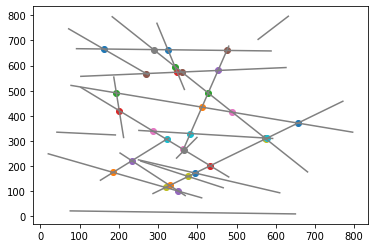

In [20]:
fig, ax = plt.subplots()
for i in range(n):
  x = [ar[i].init.x, ar[i].to.x]
  y = [ar[i].init.y, ar[i].to.y]
  ax.plot(x,y, 'gray', linestyle='-', marker='')


for elem in ans:
  ax.scatter(elem.x, elem.y)
